In [1]:
import Data_Loader as DL
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import torchviz
import sys
import copy
import os
import seaborn as sns
from time import sleep
from rich.console import Console
from memory_profiler import profile

In [2]:
def generate_new_scence(movie, target, total_target, scene_t,vec_len,variation = 0.1):
    Scence = []
    Variable = int(vec_len * variation)
    Base = 2 * torch.bernoulli(torch.empty(vec_len).uniform_(0, 1)) - 1
    Scence.append(copy.deepcopy(Base))
    for i in range(1, scene_t):
        random_index = random.sample(range(vec_len), Variable)
        next_frame = copy.deepcopy(Scence[-i])
        next_frame[random_index] = next_frame[random_index] * -1
        Scence.append(copy.deepcopy(next_frame))
        total_target.append(torch.ones(1) * 0.5)

    total_target.append(torch.zeros(1))
    movie.append(Scence)
    target.append(torch.zeros(1))

In [3]:
def generate_movie(R,T,vec_len,variation):
    movie = []
    target = []
    total_target =[]
    scene_t = 5
    for i in range(R):
        generate_new_scence(movie, target, total_target, scene_t, vec_len ,variation)

    for i in range(R, T):
        if np.random.rand() >= 0.5 and (not (target[i - R] == 1)):
            movie.append(random.sample(movie[i - R], len(movie[i - R])))
            target.append(torch.ones(1))
            for j in range(len(movie[i - R]) - 1):
                total_target.append(torch.ones(1)*0.5)
            total_target.append(torch.ones(1))

        else:
            generate_new_scence(movie, target, total_target, scene_t, vec_len ,variation)
    return movie, target, total_target

In [46]:
movie, target, total_target = generate_movie(3,100,10,0.1)

In [47]:
total_target = torch.FloatTensor(total_target).detach().numpy()

In [48]:
np.count_nonzero(total_target[4::5]==1)

29

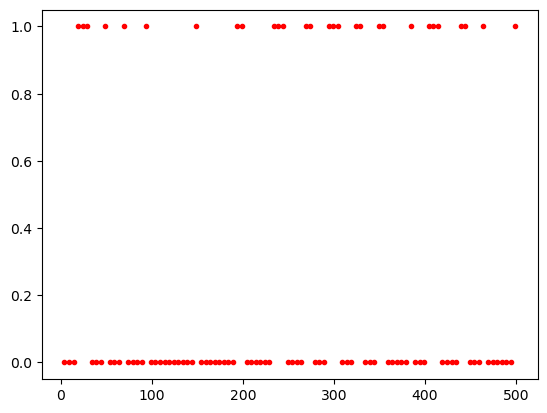

In [55]:
plt.scatter(np.arange(5 * 100)[4::5],total_target[4::5],marker='.', color='r')

In [36]:
np.arange(500)[4::5].shape

(100,)

In [35]:
total_target[4::5].shape

(100,)

In [17]:
Base

tensor([-1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1.])